In [1]:
import pandas as pd
import numpy as np
#from ml_metrics import rmsle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
w01 = pd.read_csv('NYChour2017-1.csv')

In [4]:
w01.head()

,dt,date,temp,pressure,humidity,wind_speed,weather_main
0,1.483229e+09,1/1/17 00:00,278.76,1014,44,4,Clouds
1,1.483232e+09,1/1/17 01:00,278.69,1014,48,4,Clouds
2,1.483236e+09,1/1/17 02:00,278.92,1013,48,3,Clouds
3,1.483240e+09,1/1/17 03:00,278.65,1013,48,2,Clouds
4,1.483243e+09,1/1/17 04:00,278.84,1013,45,1,Snow


In [5]:
w01["date"] = pd.to_datetime(w01["date"])
w01['month']=w01.date.dt.month 

In [6]:
w001=w01.loc[(w01['month'] == 8)]
w001 = w001[['date']]

In [7]:
w001.head()

,date
5088,2017-08-01 00:00:00
5089,2017-08-01 01:00:00
5090,2017-08-01 02:00:00
5091,2017-08-01 03:00:00
5092,2017-08-01 04:00:00


## Create new01 with count 

In [34]:
new01= new01.rename(columns={'starttime': 'date',})

In [33]:
new01.head()

,start station id,starttime,count
0,72,2017-08-01 00:00:00,1
1,72,2017-08-01 06:00:00,4
2,72,2017-08-01 07:00:00,5
3,72,2017-08-01 08:00:00,31
4,72,2017-08-01 09:00:00,12


In [35]:
mylist = new01['start station id'].unique()
stationdict = {elem : pd.DataFrame() for elem in mylist}
#d = {name: pd.DataFrame() for name in companies}
#companydict
for key in stationdict:
    stationdict[key] = new01[:][new01['start station id'] == key]

In [36]:
wholelist = {}
for n in mylist:
   wholelist[n] = pd.DataFrame()

In [37]:
for n in mylist:
  wholelist[n]=pd.merge(w001, stationdict[n], how='outer', on='date')
  wholelist[n]['start station id']= wholelist[n]['start station id'].fillna(value=n)
  wholelist[n]['count']= wholelist[n]['count'].fillna(value=0) 

## Import bike data 

In [8]:
db8 = pd.read_csv('201708-citibike-tripdata.csv')

In [9]:
db8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2
3,323,2017-08-01 00:00:27,2017-08-01 00:05:51,389,Broadway & Berry St,40.710446,-73.965251,3073,Division Ave & Hooper St,40.706913,-73.954417,18705,Subscriber,1990.0,1
4,109,2017-08-01 00:00:41,2017-08-01 00:02:31,3145,E 84 St & Park Ave,40.778627,-73.957721,3147,E 85 St & 3 Ave,40.778012,-73.954071,27975,Subscriber,1983.0,1


In [10]:
db11=db8[['start station id','start station latitude','start station longitude']]

In [11]:
original=pd.DataFrame()

In [12]:
original['start station id']=db11['start station id'].unique()

In [13]:
b=pd.merge(original, db11,on='start station id',how='outer')

In [14]:
original=b.drop_duplicates(subset=['start station id','start station latitude','start station longitude'], keep='first')

In [15]:
mylist=db11['start station id'].unique()

In [16]:
original.head()

,start station id,start station latitude,start station longitude
0,470,40.743453,-74.000040
4223,348,40.724910,-74.001547
8628,3165,40.775794,-73.976206
15249,389,40.710446,-73.965251
17550,3145,40.778627,-73.957721


In [13]:
a=a.drop('index', axis=1)

In [18]:
db= db8[['starttime','start station id']]
db["starttime"] = pd.to_datetime(db8["starttime"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
db['starttime'] = db['starttime'].apply(lambda t: t.replace(second=0))
db['starttime'] = db['starttime'].apply(lambda t: t.replace(minute=0))
new01=db.groupby(['start station id','starttime']).size().reset_index(name='count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
## group weahter first 

In [40]:
wholelist[72].head()
for n in mylist:
    wholelist[n]['year']=wholelist[n].date.dt.year 
    wholelist[n]['month']=wholelist[n].date.dt.month 
    wholelist[n]['day']=wholelist[n].date.dt.day
    wholelist[n]['hour']=wholelist[n].date.dt.hour
    wholelist[n]['weekday']=wholelist[n].date.dt.dayofweek

In [21]:
new01['year']=new01.starttime.dt.year 
new01['month']=new01.starttime.dt.month 
new01['day']=new01.starttime.dt.day
new01['hour']=new01.starttime.dt.hour
new01['weekday']=new01.starttime.dt.dayofweek

In [54]:
new01['day']=new01.date.dt.day

In [159]:
#new01['ymddate']=pd.to_datetime(new01[['year', 'month', 'day']])

In [163]:
#new01['weekday']=weekday(new01['ymddate'])

NameError: name 'weekday' is not defined

In [30]:
new01

,start station id,date,count,year,month,day,hour,weekday
0,72,2017-08-01 00:00:00,1,2017,8,1,0,1
1,72,2017-08-01 06:00:00,4,2017,8,1,6,1
2,72,2017-08-01 07:00:00,5,2017,8,1,7,1
3,72,2017-08-01 08:00:00,31,2017,8,1,8,1
4,72,2017-08-01 09:00:00,12,2017,8,1,9,1
5,72,2017-08-01 10:00:00,10,2017,8,1,10,1
6,72,2017-08-01 11:00:00,2,2017,8,1,11,1
7,72,2017-08-01 12:00:00,5,2017,8,1,12,1
8,72,2017-08-01 13:00:00,2,2017,8,1,13,1
9,72,2017-08-01 14:00:00,7,2017,8,1,14,1


## This is station count  sort by number vulume 

In [119]:
stationcount=new01.groupby(['start station id'])['count'].sum().reset_index(name='count')

In [125]:
stationcount=stationcount.sort_values('count')

In [127]:
for n in stationcount['start station id']:
    a=str(n)
    stationlist.append(a)
stationlist

['3245',
 '3250',
 '3470',
 '3040',
 '3488',
 '3485',
 '3468',
 '3432',
 '3489',
 '3394',
 '3333',
 '3395',
 '2005',
 '3477',
 '3326',
 '3337',
 '3352',
 '3075',
 '3127',
 '3123',
 '3327',
 '3340',
 '3393',
 '421',
 '3457',
 '119',
 '3128',
 '3392',
 '3044',
 '3330',
 '3309',
 '3456',
 '3069',
 '3302',
 '3401',
 '420',
 '3452',
 '3063',
 '3421',
 '3424',
 '3179',
 '3322',
 '3065',
 '3342',
 '3059',
 '2001',
 '3053',
 '3043',
 '3221',
 '3399',
 '443',
 '3324',
 '3381',
 '373',
 '3467',
 '3144',
 '3060',
 '3061',
 '3371',
 '3441',
 '3130',
 '3072',
 '3332',
 '3066',
 '3046',
 '3338',
 '3313',
 '3405',
 '3387',
 '3055',
 '3363',
 '3054',
 '436',
 '3070',
 '3056',
 '3469',
 '289',
 '3449',
 '3048',
 '3348',
 '3073',
 '3050',
 '3071',
 '3317',
 '3095',
 '3041',
 '3049',
 '3120',
 '3249',
 '3345',
 '3303',
 '3391',
 '3478',
 '3404',
 '3296',
 '3058',
 '3121',
 '3057',
 '3297',
 '372',
 '3157',
 '3386',
 '3455',
 '3410',
 '3241',
 '144',
 '3122',
 '3347',
 '3413',
 '3353',
 '3412',
 '3359',
 

<BarContainer object of 10 artists>

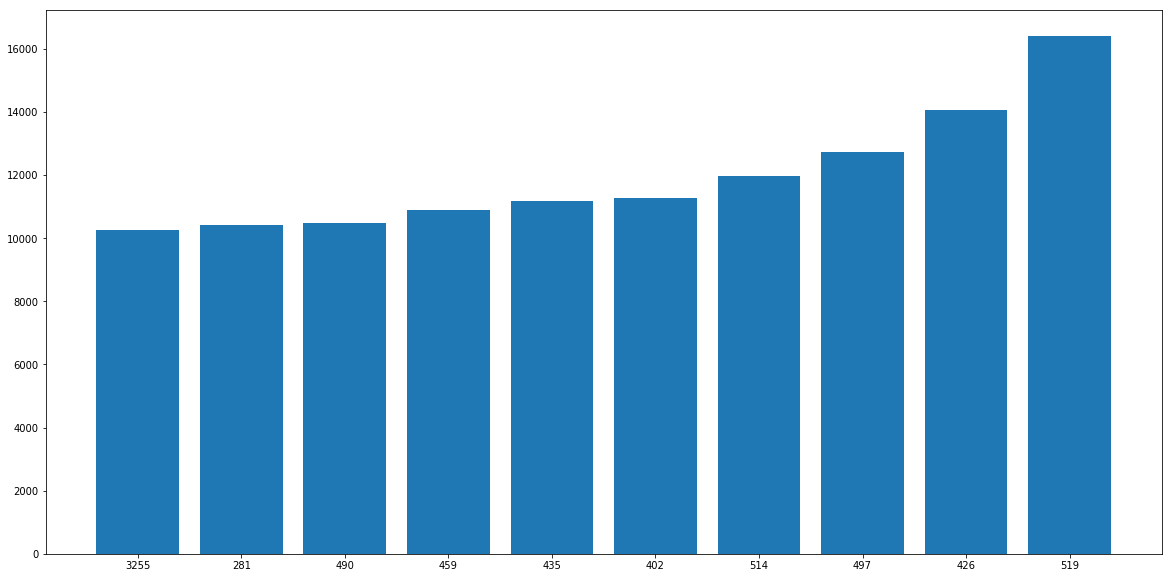

In [132]:
plt.figure(figsize=(20,10))

plt.bar(stationlist[-10:],stationcount['count'][-10:])

## This is station count  sort by WEEKAY vulume 


In [41]:
stationdict[519].head()

,start station id,date,count,year,month,day,hour,weekday
145388,519,2017-08-01 00:00:00,1,2017,8,1,0,1
145389,519,2017-08-01 02:00:00,1,2017,8,1,2,1
145390,519,2017-08-01 05:00:00,7,2017,8,1,5,1
145391,519,2017-08-01 06:00:00,30,2017,8,1,6,1
145392,519,2017-08-01 07:00:00,63,2017,8,1,7,1


In [42]:
month01519=stationdict[519].groupby(['weekday'])['count'].sum().reset_index(name='weekdaycount')

In [43]:
month01519

,weekday,weekdaycount
0,0,2215
1,1,3182
2,2,3534
3,3,3558
4,4,1881
5,5,1144
6,6,883


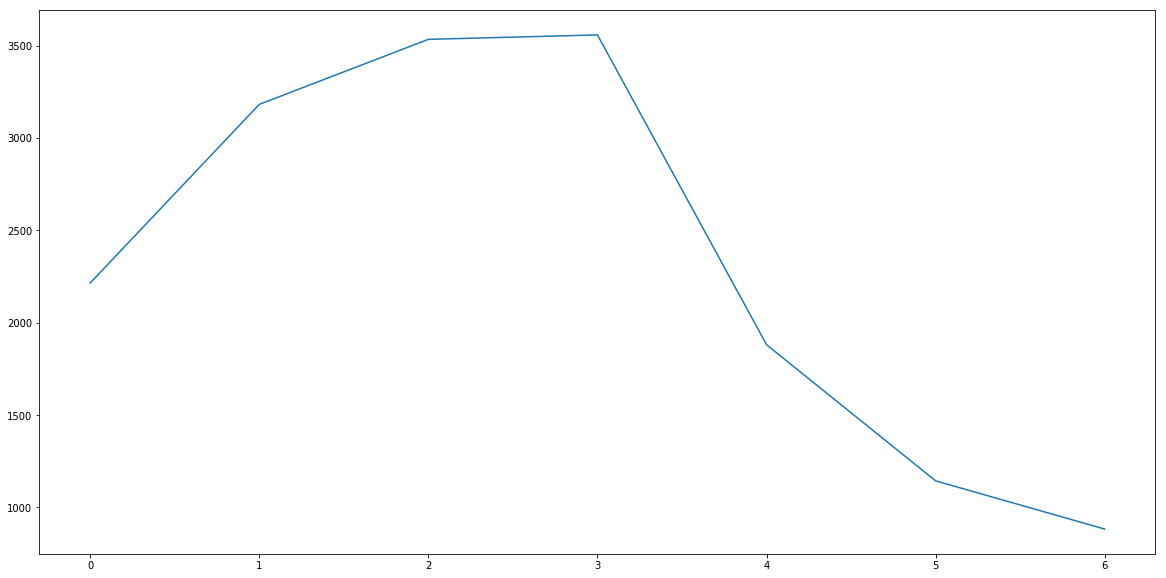

In [46]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.plot(month01519['weekday'],month01519['weekdaycount'])

## This is day count 

In [76]:
month01=stationdict[519].groupby(['day'])['count'].sum().reset_index(name='daycount')

In [134]:
month01

,day,daycount
0,1,166
1,2,142
2,3,159
3,4,113
4,5,124
5,6,157
6,7,47
7,8,140
8,9,162
9,10,171


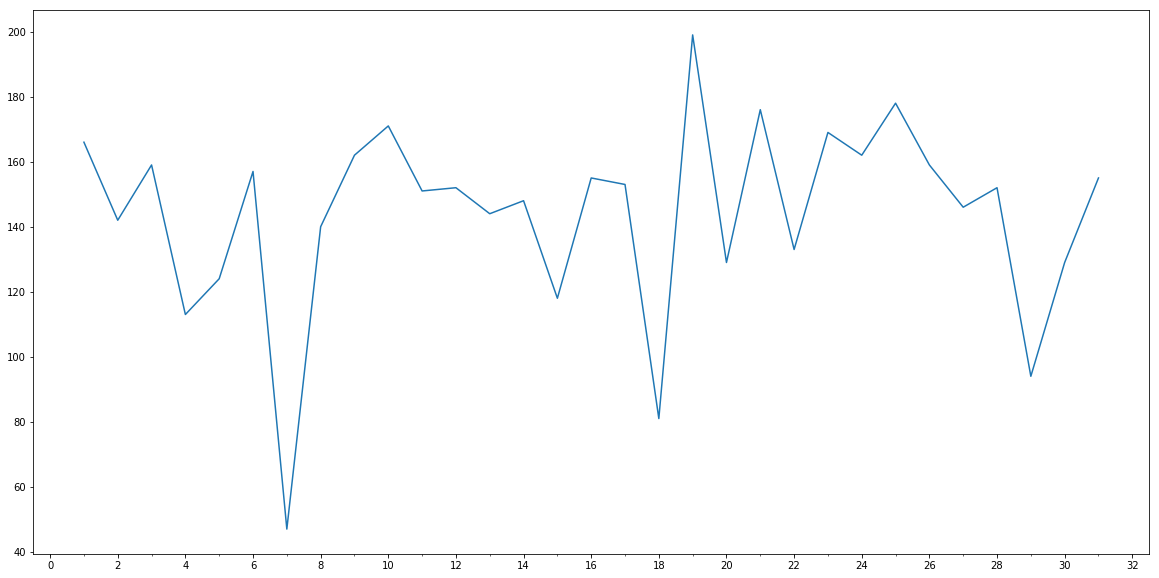

In [143]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.plot(month01['day'],month01['daycount'])

## the weekday 

In [169]:
stationdict[519]

,start station id,starttime,count,year,month,day,hour,date,weekday
145388,519,2017-08-01 00:00:00,1,2017,8,1,0,2017-08-01,1
145389,519,2017-08-01 02:00:00,1,2017,8,1,2,2017-08-01,1
145390,519,2017-08-01 05:00:00,7,2017,8,1,5,2017-08-01,1
145391,519,2017-08-01 06:00:00,30,2017,8,1,6,2017-08-01,1
145392,519,2017-08-01 07:00:00,63,2017,8,1,7,2017-08-01,1
145393,519,2017-08-01 08:00:00,72,2017,8,1,8,2017-08-01,1
145394,519,2017-08-01 09:00:00,64,2017,8,1,9,2017-08-01,1
145395,519,2017-08-01 10:00:00,17,2017,8,1,10,2017-08-01,1
145396,519,2017-08-01 11:00:00,21,2017,8,1,11,2017-08-01,1
145397,519,2017-08-01 12:00:00,19,2017,8,1,12,2017-08-01,1


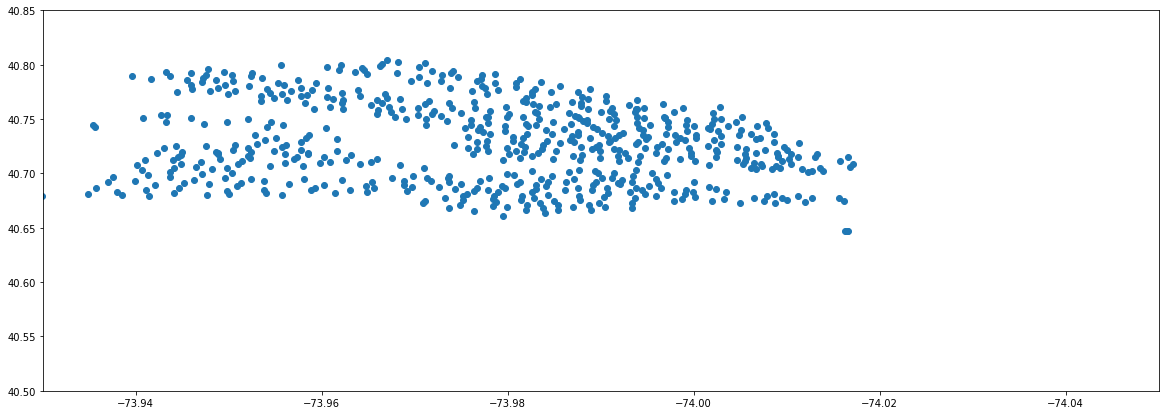

In [14]:
plt.figure(figsize=(20, 7))  
y=a['Start Station Latitude']
x=a['Start Station Longitude']
plt.ylim(40.500,40.850)
plt.xlim(-73.930,-74.0500)
plt.scatter(x,y, label='True Position')

In [22]:
loc_df = pd.DataFrame()
loc_df['longitude'] = a['start station longitude']
loc_df['latitude'] = a['start station latitude']
print(loc_df)

                  longitude   latitude
start station id                      
470              -74.000040  40.743453
348              -74.001547  40.724910
3165             -73.976206  40.775794
389              -73.965251  40.710446
3145             -73.957721  40.778627
3373             -73.987752  40.675071
3429             -73.977908  40.685068
495              -73.993012  40.762699
423              -73.986905  40.765849
3119             -73.954117  40.742327
3474             -74.004121  40.725256
479              -73.991255  40.760193
3358             -73.974841  40.671198
3159             -73.982666  40.774925
379              -73.991600  40.749156
3150             -73.948034  40.775369
377              -74.005664  40.722438
293              -73.991026  40.730207
83               -73.976323  40.683826
3478             -74.008702  40.657089
285              -73.990741  40.734546
3263             -73.990868  40.729236
396              -73.955769  40.680342
457              -73.9816

[]

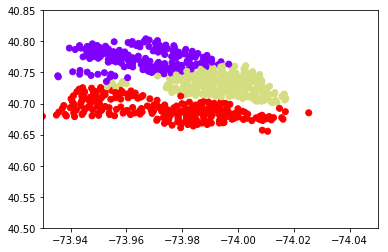

In [30]:
# print(loc_df)
#XY=loc_df.values.tolist()
# X=XY[:][1]
# print(X)
kmeans = KMeans(n_clusters=4,random_state=2,n_init = 10)
kmeans.fit(loc_df) 

plt.ylim(40.500,40.850)
plt.xlim(-73.930,-74.0500)

plt.scatter(loc_df['longitude'][0:],loc_df['latitude'][0:], c=kmeans.labels_, cmap='rainbow')  
plt.plot()

In [32]:
loc_df['cl']=kmeans.labels_

In [33]:
loc_df

,longitude,latitude,cl
start station id,,,
470,-74.000040,40.743453,2
348,-74.001547,40.724910,2
3165,-73.976206,40.775794,0
389,-73.965251,40.710446,3
3145,-73.957721,40.778627,0
3373,-73.987752,40.675071,3
3429,-73.977908,40.685068,3
495,-73.993012,40.762699,0
423,-73.986905,40.765849,0


In [35]:
kmeans_1 = KMeans(n_clusters=4)
# Using fit_predict to cluster the dataset
#X = loc_df[['longitude','latitude']].values
predictions = kmeans_1.fit_predict(loc_df) 

[]

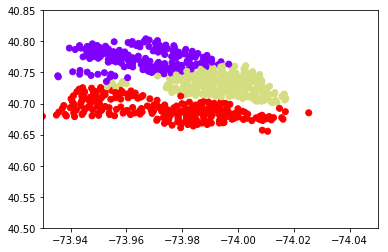

In [36]:
plt.ylim(40.500,40.850)
plt.xlim(-73.930,-74.0500)
plt.scatter(loc_df['longitude'][:],loc_df['latitude'][:], c=kmeans.labels_, cmap='rainbow')  
plt.plot()

In [16]:
X = loc_df[['longitude','latitude']].values

In [17]:
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]

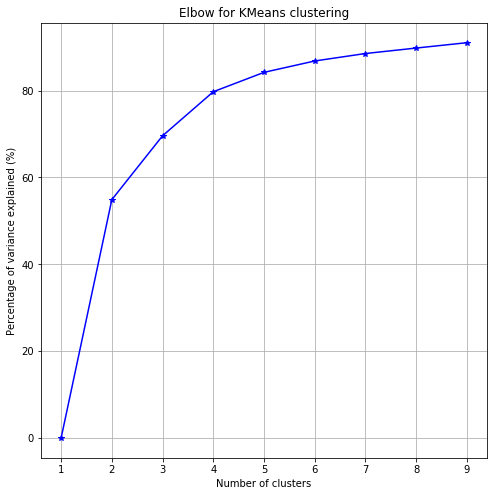

In [99]:
from scipy.spatial.distance import cdist, pdist

def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)

##  Group the dataset to become 600*48 

In [42]:
aa111=wholelist[519]

In [44]:
aa111.head()

,date,start station id,count,year,month,day,hour,weekday
0,2017-08-01 00:00:00,519.0,1.0,2017,8,1,0,1
1,2017-08-01 01:00:00,519.0,0.0,2017,8,1,1,1
2,2017-08-01 02:00:00,519.0,1.0,2017,8,1,2,1
3,2017-08-01 03:00:00,519.0,0.0,2017,8,1,3,1
4,2017-08-01 04:00:00,519.0,0.0,2017,8,1,4,1


In [103]:
aa111['day']=aa111['date'].dt.day

In [60]:
stateiongroup = {elem : pd.DataFrame() for elem in mylist}

In [61]:
for n in mylist: 
    pre=wholelist[n]
    pre['day']=pre['date'].dt.day
    aa107=pre.loc[(pre['day'] == 19)]
    aa119=pre.loc[(pre['day'] == 10)]
    new02=pd.concat([aa119,aa107])
    stateiongroup[n] = new02[:][new02['start station id'] == n]

In [62]:
stateiongroup[72].head()

,date,start station id,count,year,month,day,hour,weekday
216,2017-08-10 00:00:00,72.0,0.0,2017,8,10,0,3
217,2017-08-10 01:00:00,72.0,0.0,2017,8,10,1,3
218,2017-08-10 02:00:00,72.0,0.0,2017,8,10,2,3
219,2017-08-10 03:00:00,72.0,1.0,2017,8,10,3,3
220,2017-08-10 04:00:00,72.0,0.0,2017,8,10,4,3


In [63]:
for n in mylist:
    stateiongroup[n]=stateiongroup[n].drop('day',axis=1)
    stateiongroup[n]=stateiongroup[n].drop('year',axis=1)
    stateiongroup[n]=stateiongroup[n].drop('weekday',axis=1)
    stateiongroup[n]=stateiongroup[n].drop('month',axis=1)
    stateiongroup[n]=stateiongroup[n].drop('hour',axis=1)
    stateiongroup[n]=stateiongroup[n].drop('start station id',axis=1)
    #stateiongroup[n].insert(0, 'stationid',n)

In [64]:
for n in mylist: 
    stateiongroup[n] = stateiongroup[n].set_index("date").transpose()
    stateiongroup[n].insert(0, 'stationid',n)

In [65]:
stateiongroup[72]

date,stationid,2017-08-10 00:00:00,2017-08-10 01:00:00,2017-08-10 02:00:00,2017-08-10 03:00:00,2017-08-10 04:00:00,2017-08-10 05:00:00,2017-08-10 06:00:00,2017-08-10 07:00:00,2017-08-10 08:00:00,...,2017-08-19 14:00:00,2017-08-19 15:00:00,2017-08-19 16:00:00,2017-08-19 17:00:00,2017-08-19 18:00:00,2017-08-19 19:00:00,2017-08-19 20:00:00,2017-08-19 21:00:00,2017-08-19 22:00:00,2017-08-19 23:00:00
count,72,0.0,0.0,0.0,1.0,0.0,1.0,2.0,8.0,22.0,...,17.0,31.0,21.0,15.0,19.0,10.0,17.0,5.0,1.0,0.0


In [66]:
finalda=stateiongroup[72]

In [67]:
for n in mylist[1:]:
    finalda=finalda.append(stateiongroup[n])

In [68]:
finalda=finalda.set_index('stationid')

In [70]:
finalda.to_csv('daily1019.csv', encoding='utf-8', index=True)

# Clustering start 
### clustering the station with daily hour 

In [219]:
finalda.head()

date,2017-08-10 00:00:00,2017-08-10 01:00:00,2017-08-10 02:00:00,2017-08-10 03:00:00,2017-08-10 04:00:00,2017-08-10 05:00:00,2017-08-10 06:00:00,2017-08-10 07:00:00,2017-08-10 08:00:00,2017-08-10 09:00:00,...,2017-08-19 14:00:00,2017-08-19 15:00:00,2017-08-19 16:00:00,2017-08-19 17:00:00,2017-08-19 18:00:00,2017-08-19 19:00:00,2017-08-19 20:00:00,2017-08-19 21:00:00,2017-08-19 22:00:00,2017-08-19 23:00:00
stationid,,,,,,,,,,,,,,,,,,,,,
72,0.0,0.0,0.0,1.0,0.0,1.0,2.0,8.0,22.0,19.0,...,17.0,31.0,21.0,15.0,19.0,10.0,17.0,5.0,1.0,0.0
79,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,8.0,7.0,...,9.0,3.0,7.0,7.0,7.0,4.0,0.0,0.0,1.0,3.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,6.0,...,1.0,3.0,2.0,3.0,12.0,5.0,1.0,1.0,3.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,6.0,0.0,4.0,5.0,7.0,1.0,8.0,1.0,0.0,3.0
116,5.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,9.0,...,13.0,12.0,7.0,3.0,3.0,5.0,8.0,7.0,1.0,3.0


In [199]:
clustring1 = pd.read_csv('daily1019.csv')

In [221]:
x=clustring1.iloc[:,1:]

In [76]:
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(x) for i in Ks]

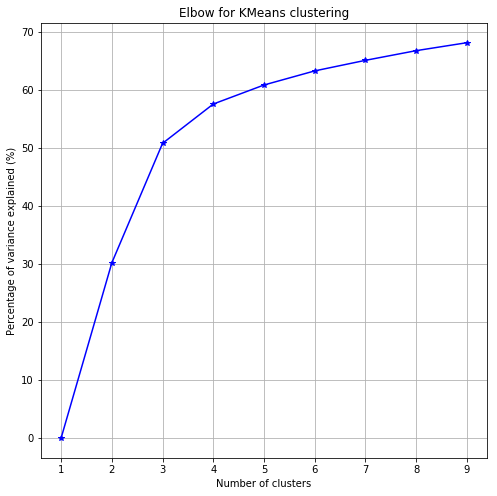

In [77]:
from scipy.spatial.distance import cdist, pdist

def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean,x)

In [ ]:
plt.ylim(40.500,40.850)
plt.xlim(-73.930,-74.0500)
plt.scatter(loc_df['longitude'][:],loc_df['latitude'][:], c=kmeans.labels_, cmap='rainbow')  
plt.plot()

In [119]:
finalda1=finalda.reset_index()
#b=pd.merge(original, db11,on='start station id',how='outer')

In [185]:
finalda.head()

date,2017-08-19 00:00:00,2017-08-19 01:00:00,2017-08-19 02:00:00,2017-08-19 03:00:00,2017-08-19 04:00:00,2017-08-19 05:00:00,2017-08-19 06:00:00,2017-08-19 07:00:00,2017-08-19 08:00:00,2017-08-19 09:00:00,...,2017-08-07 14:00:00,2017-08-07 15:00:00,2017-08-07 16:00:00,2017-08-07 17:00:00,2017-08-07 18:00:00,2017-08-07 19:00:00,2017-08-07 20:00:00,2017-08-07 21:00:00,2017-08-07 22:00:00,2017-08-07 23:00:00
stationid,,,,,,,,,,,,,,,,,,,,,
72,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,11.0,...,0.0,0.0,2.0,3.0,3.0,4.0,2.0,3.0,0.0,0.0
79,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,1.0,0.0,2.0,5.0,2.0,4.0,0.0,2.0,3.0,0.0
82,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0,0.0,2.0
116,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,5.0,4.0,...,0.0,1.0,1.0,16.0,2.0,6.0,3.0,6.0,0.0,0.0


In [123]:
finalda1= finalda1.rename(columns={'stationid': 'start station id',})

In [125]:
final=pd.merge(original, finalda1, how='outer', on='start station id')

In [129]:
final1=final.set_index('stationid')

In [222]:
kmeans = KMeans(n_clusters=4,random_state=2,n_init = 10)
kmeans.fit(x.values) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [223]:
len(kmeans.labels_)

625

In [177]:
original=original.drop('custering',axis=1)

In [79]:
original

,start station id,start station latitude,start station longitude
0,470,40.743453,-74.000040
4223,348,40.724910,-74.001547
8628,3165,40.775794,-73.976206
15249,389,40.710446,-73.965251
17550,3145,40.778627,-73.957721
19259,3373,40.675071,-73.987752
20586,3429,40.685068,-73.977908
24349,495,40.762699,-73.993012
28621,423,40.765849,-73.986905
31796,3119,40.742327,-73.954117


In [80]:
mycluster1=original.copy()

In [81]:
mycluster1=mycluster1.sort_values('start station id')

In [224]:
finalda['cluster']=kmeans.labels_
####  myclustirng1 is for demand pattern using name clustering 

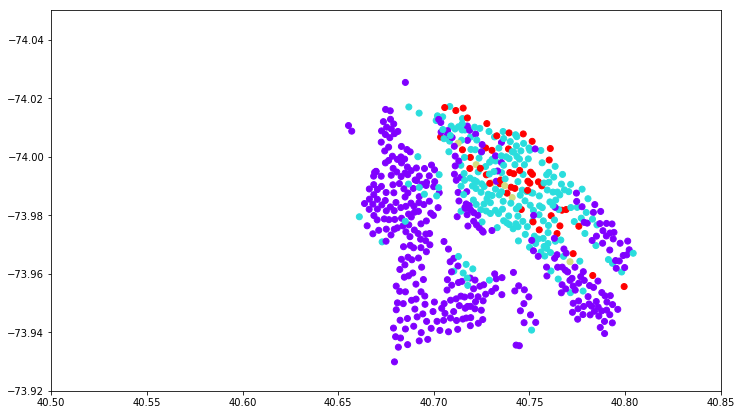

In [210]:
plt.figure(figsize=(12,7))
plt.xlim(40.500,40.850)
plt.ylim(-73.920,-74.0500)
plt.scatter(mycluster1['start station latitude'][:],mycluster1['start station longitude'][:],c=mycluster1['custering'], cmap='rainbow')  

## Pattern For POI

In [281]:
mycluster1

,start station id,start station latitude,start station longitude,custering
210570,72,40.767272,-73.993929,1
1202662,79,40.719116,-74.006667,1
1327626,82,40.711174,-74.000165,0
72135,83,40.683826,-73.976323,0
1058083,116,40.741776,-74.001497,1
1333443,119,40.696089,-73.978034,0
1442853,120,40.686768,-73.959282,0
481846,127,40.731724,-74.006744,1
948801,128,40.727103,-74.002971,3
1770187,143,40.692395,-73.993379,0


In [90]:
codelist = pd.read_csv('codelist.csv')

In [91]:
codelist=codelist.sort_values('station').reset_index(drop=True)

In [93]:
codelist.head()

,station,1,2,3,4,5,6,7,8,9,10,11,12
0,72,596,18,15,29,713,0,8,218,8,112,23,62
1,79,2614,64,43,69,2386,0,97,398,4,906,55,93
2,82,955,59,49,57,1532,0,178,354,3,590,27,61
3,83,375,27,39,33,826,0,25,186,2,104,13,63
4,116,1657,31,61,70,2328,0,10,598,3,259,32,79


In [94]:
aa=codelist.iloc[:,1:13]

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
try1234 = scaler.fit_transform(aa)
#try1111 = scaler.fit_transform(aa)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [96]:
try1234=pd.DataFrame(try1234)

In [97]:
try1234=try1234.drop(5,axis=1)

In [98]:
try1234.insert(0, 'start station id',codelist['station'])

In [99]:
try1234=try1234.set_index('start station id')

In [101]:
try1234.head()

,0,1,2,3,4,6,7,8,9,10,11
start station id,,,,,,,,,,,
72,0.053864,0.107784,0.042373,0.177914,0.072173,0.030651,0.208214,0.266667,0.016422,0.232323,0.360465
79,0.236240,0.383234,0.121469,0.423313,0.241522,0.371648,0.380134,0.133333,0.132845,0.555556,0.540698
82,0.086308,0.353293,0.138418,0.349693,0.155076,0.681992,0.338109,0.100000,0.086510,0.272727,0.354651
83,0.033891,0.161677,0.110169,0.202454,0.083612,0.095785,0.177650,0.066667,0.015249,0.131313,0.366279
116,0.149751,0.185629,0.172316,0.429448,0.235651,0.038314,0.571156,0.100000,0.037977,0.323232,0.459302


In [156]:
kmeans = KMeans(n_clusters=6,random_state=2,n_init = 10)
kmeans.fit(try1234) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [157]:
len(kmeans.labels_)

625

In [159]:
try1234['cluster']=kmeans.labels_

In [162]:
codelist['cluster']=kmeans.labels_

In [61]:
try1111
try1111= try1111.rename(columns={'stationid': 'start station id ',})

In [77]:
try1111.insert(0, 'start station id',codelist['station'])

In [103]:
mycluster2=original.copy()

In [104]:
mycluster2=mycluster2.sort_values('start station id').reset_index(drop=True)

In [132]:
mycluster2['cluster']=kmeans.labels_

In [257]:
mycluster2

,start station id,start station latitude,start station longitude,cluster
0,72,40.767272,-73.993929,0
1,79,40.719116,-74.006667,5
2,82,40.711174,-74.000165,5
3,83,40.683826,-73.976323,0
4,116,40.741776,-74.001497,1
5,119,40.696089,-73.978034,0
6,120,40.686768,-73.959282,0
7,127,40.731724,-74.006744,4
8,128,40.727103,-74.002971,1
9,143,40.692395,-73.993379,4


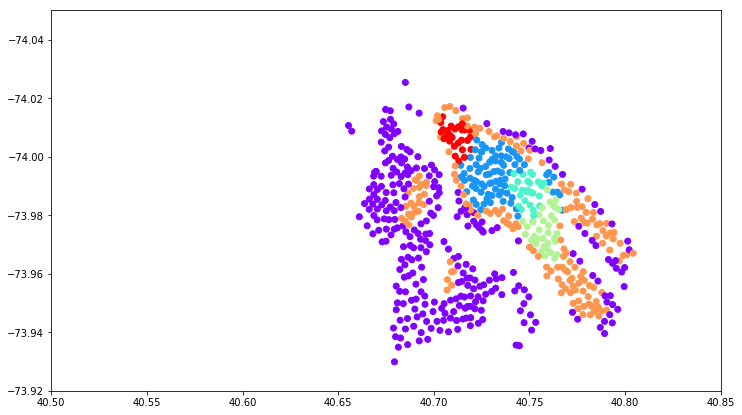

In [133]:
plt.figure(figsize=(12,7))
plt.xlim(40.500,40.850)
plt.ylim(-73.920,-74.0500)
plt.scatter(mycluster2['start station latitude'][:],mycluster2['start station longitude'][:],c=mycluster2['cluster'], cmap='rainbow')  

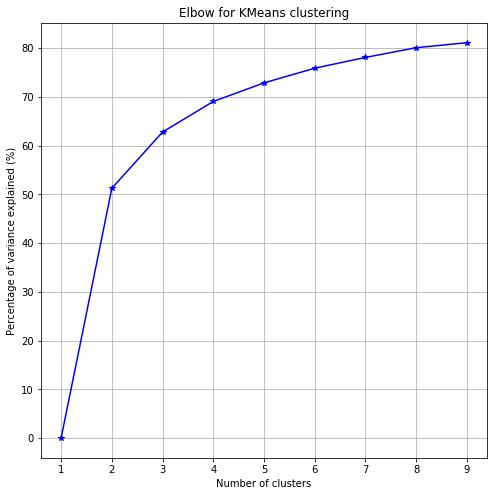

In [263]:
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(try1234) for i in Ks]
from scipy.spatial.distance import cdist, pdist

def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean,try1234)

In [217]:
x=mycluster1['start station latitude'].loc[(mycluster1['custering'] ==2)].values
y=mycluster1['start station longitude'].loc[(mycluster1['custering'] ==2)].values

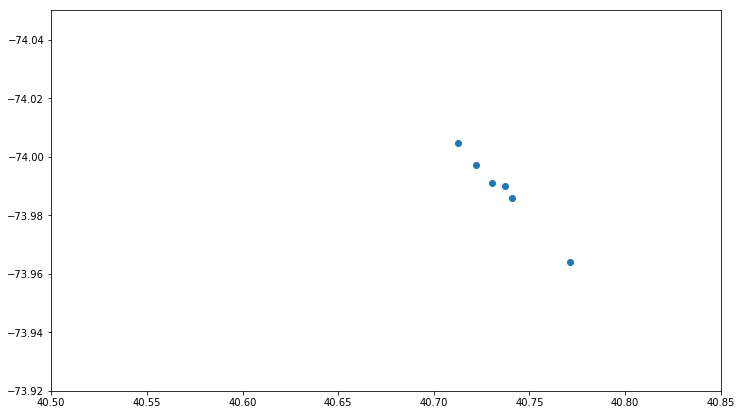

In [218]:
plt.figure(figsize=(12,7))
plt.xlim(40.500,40.850)
plt.ylim(-73.920,-74.0500)
plt.scatter(x,y, cmap='rainbow')  

In [264]:
from sklearn.metrics.cluster import adjusted_rand_score


In [271]:
adjusted_rand_score(mycluster1['custering'],mycluster2['cluster'])  

0.18845880794744357

In [274]:
mycluster1=mycluster1.reset_index(drop=True)

In [134]:
group10=mycluster1.loc[(mycluster1['custering'] ==0)]
group11=mycluster1.loc[(mycluster1['custering'] ==1)]
group12=mycluster1.loc[(mycluster1['custering'] ==2)]
group13=mycluster1.loc[(mycluster1['custering'] ==3)]

In [229]:
group12

,start station id,start station latitude,start station longitude,custering
158808,151,40.722104,-73.997249,2
62049,293,40.730207,-73.991026,2
636391,387,40.712733,-74.004607,2
434704,491,40.740964,-73.986022,2
450740,497,40.737050,-73.990093,2
1754248,3139,40.771183,-73.964094,2


In [135]:
group20=mycluster2.loc[(mycluster2['cluster'] ==0)]
group21=mycluster2.loc[(mycluster2['cluster'] ==1)]
group22=mycluster2.loc[(mycluster2['cluster'] ==2)]
group23=mycluster2.loc[(mycluster2['cluster'] ==3)]
group24=mycluster2.loc[(mycluster2['cluster'] ==4)]
group25=mycluster2.loc[(mycluster2['cluster'] ==5)]

In [289]:
mycluster2['start station id'].loc[(mycluster2['cluster'] ==3)].values

array([  82,  116,  127,  143,  174,  212,  232,  239,  243,  248,  249,
        259,  261,  276,  279,  301,  307,  308,  309,  310,  314,  315,
        317,  322,  323,  324,  328,  331,  346,  347,  349,  350,  358,
        363,  390,  392,  395,  400,  408,  410,  422,  426,  427,  433,
        434,  445,  448,  453,  454,  455,  461,  462,  467,  470,  480,
        495,  499,  504,  507,  509,  513,  516,  527,  528,  530,  532,
        534,  536,  545, 2003, 2006, 2008, 2009, 2012, 2022, 3002, 3073,
       3075, 3078, 3080, 3131, 3135, 3136, 3139, 3140, 3141, 3142, 3144,
       3145, 3146, 3147, 3148, 3150, 3151, 3152, 3156, 3158, 3159, 3161,
       3162, 3164, 3167, 3170, 3171, 3172, 3175, 3176, 3177, 3224, 3231,
       3232, 3238, 3242, 3243, 3250, 3259, 3283, 3284, 3285, 3286, 3288,
       3289, 3290, 3293, 3294, 3296, 3301, 3305, 3309, 3312, 3314, 3316,
       3318, 3325, 3327, 3338, 3355, 3356, 3359, 3360, 3362, 3370, 3372,
       3375, 3376, 3378, 3379, 3402, 3410, 3412, 34

In [285]:
from math import*
  
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
  
print(jaccard_similarity(group10['start station id'].values,group20['start station id'].values))


0.5635964912280702


In [137]:
from math import*
  
def square_rooted(x):
  
   return round(sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
  
print (cosine_similarity(group10['start station id'].values,group20['start station id'].values))

0.807


In [138]:
for n in range(6):
    result=cosine_similarity(group10['start station id'].values,mycluster2['start station id'].loc[(mycluster2['cluster'] ==n)].values)
    print(result)

0.807
0.037
0.015
0.022
0.38
0.013


In [140]:
for n in range(6):
    result=cosine_similarity(group11['start station id'].values,mycluster2['start station id'].loc[(mycluster2['cluster'] ==n)].values)
    print(result)

0.595
0.086
0.03
0.048
0.349
0.026


In [142]:
for n in range(6):
    result=cosine_similarity(group12['start station id'].values,mycluster2['start station id'].loc[(mycluster2['cluster'] ==n)].values)
    print(result)

0.004
0.026
0.12
0.034
0.011
0.062


In [143]:
for n in range(6):
    result=cosine_similarity(group13['start station id'].values,mycluster2['start station id'].loc[(mycluster2['cluster'] ==n)].values)
    print(result)

0.035
0.15
0.12
0.178
0.061
0.103


In [130]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(try1234)

silhouette_avg = silhouette_score(try1234, cluster_labels)
print("For n_clusters =",4,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 4 The average silhouette_score is : 0.3399567913299274


In [279]:
table=table.set_index("Cluster1")

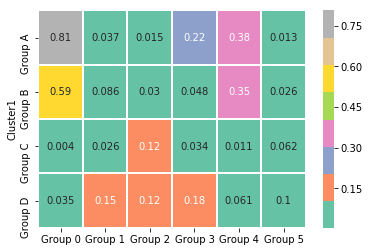

In [280]:
sns.heatmap(data=table,cmap="Set2",linecolor="white",linewidths=1,annot=True)

In [256]:
table

,Group 0,Group 1,Group 2,Group 3,Group 4,Group 5
Unnamed: 0,,,,,,
Group 0,0.807,0.037,0.015,0.220,0.380,0.013
Group 1,0.595,0.086,0.030,0.048,0.349,0.026
Group 2,0.004,0.026,0.120,0.034,0.011,0.062
Group 3,0.035,0.150,0.120,0.178,0.061,0.103
